# Regressao Linear - Açudes da Paraíba 
## Época da seca - até Março 2017 - Boqueirão
#### http://www.aesa.pb.gov.br/aesa-website/monitoramento/volume-acude/?id_acude=531
#### http://www.aesa.pb.gov.br/aesa-website/monitoramento/volume-diario/?tipo=atual

## Nome: Matricula - Nome do Açude

In [1]:
import pandas as pd

## Leitura do dataset
## Acude de Boqueirão - Previsão de Seca - 31/01/2008 ate 31/03/2017

In [3]:
# Acude de Boqueirão com Recarga do Rio São Francisco - 31/01/2008 ate 31/03/2017
df = pd.read_excel(open("Boqueirao_sem_recarga3.xlsx",'rb'))
df.head()

,Açude,Data do registro,Volume (%),Volume (m³),Volume de chuvas (mm)
0,Epitácio Pessoa,31/01/2008,67.39,2.774251e+08,0
1,Epitácio Pessoa,29/02/2008,65.23,2.685472e+08,0
2,Epitácio Pessoa,31/03/2008,110.03,4.529657e+08,0
3,Epitácio Pessoa,30/04/2008,104.93,4.319852e+08,0
4,Epitácio Pessoa,31/05/2008,104.83,4.315656e+08,0


In [4]:
del df["Açude"]
df.head(10)

,Data do registro,Volume (%),Volume (m³),Volume de chuvas (mm)
0,31/01/2008,67.39,2.774251e+08,0
1,29/02/2008,65.23,2.685472e+08,0
2,31/03/2008,110.03,4.529657e+08,0
3,30/04/2008,104.93,4.319852e+08,0
4,31/05/2008,104.83,4.315656e+08,0
5,30/06/2008,102.16,4.205598e+08,0
6,31/07/2008,100.78,4.148863e+08,0
7,31/08/2008,99.05,4.077733e+08,0
8,30/09/2008,96.67,3.979907e+08,0
9,31/10/2008,94.00,3.870028e+08,0


In [5]:
df.tail()

,Data do registro,Volume (%),Volume (m³),Volume de chuvas (mm)
106,30/11/2016,5.39,22196764.40,0
107,31/12/2016,4.82,19828074.48,0
108,31/01/2017,4.21,17343204.52,0
109,28/02/2017,3.72,15312655.88,0
110,31/03/2017,3.18,13094571.31,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Data do registro       111 non-null    object 
 1   Volume (%)             111 non-null    float64
 2   Volume (m³)            111 non-null    float64
 3   Volume de chuvas (mm)  111 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 3.6+ KB


In [7]:
# converter atributo para data
df['Data do registro'] =  pd.to_datetime( df['Data do registro'], format="%d/%m/%Y") 
df.head()

,Data do registro,Volume (%),Volume (m³),Volume de chuvas (mm)
0,2008-01-31,67.39,2.774251e+08,0
1,2008-02-29,65.23,2.685472e+08,0
2,2008-03-31,110.03,4.529657e+08,0
3,2008-04-30,104.93,4.319852e+08,0
4,2008-05-31,104.83,4.315656e+08,0


In [8]:
# colocar a data como indice para fazer uma série temporal
df2 = df.set_index(pd.DatetimeIndex(df['Data do registro']))
del df2['Data do registro']
df2.head()

,Volume (%),Volume (m³),Volume de chuvas (mm)
Data do registro,,,
2008-01-31,67.39,2.774251e+08,0
2008-02-29,65.23,2.685472e+08,0
2008-03-31,110.03,4.529657e+08,0
2008-04-30,104.93,4.319852e+08,0
2008-05-31,104.83,4.315656e+08,0


In [9]:
#del df2["Açude"]
df2.describe()

,Volume (%),Volume (m³),Volume de chuvas (mm)
count,111.000000,1.110000e+02,111.0
mean,59.710360,2.458193e+08,0.0
std,35.520442,1.462318e+08,0.0
min,3.180000,1.309457e+07,0.0
25%,23.640000,9.731290e+07,0.0
50%,67.390000,2.774251e+08,0.0
75%,90.150000,3.711295e+08,0.0
max,110.030000,4.529657e+08,0.0


In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 111 entries, 2008-01-31 to 2017-03-31
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Volume (%)             111 non-null    float64
 1   Volume (m³)            111 non-null    float64
 2   Volume de chuvas (mm)  111 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 3.5 KB


In [11]:
#del df2["Açude"]
#del df2["Data do registro"]
df2.head()

,Volume (%),Volume (m³),Volume de chuvas (mm)
Data do registro,,,
2008-01-31,67.39,2.774251e+08,0
2008-02-29,65.23,2.685472e+08,0
2008-03-31,110.03,4.529657e+08,0
2008-04-30,104.93,4.319852e+08,0
2008-05-31,104.83,4.315656e+08,0


## Plota dados da época da seca

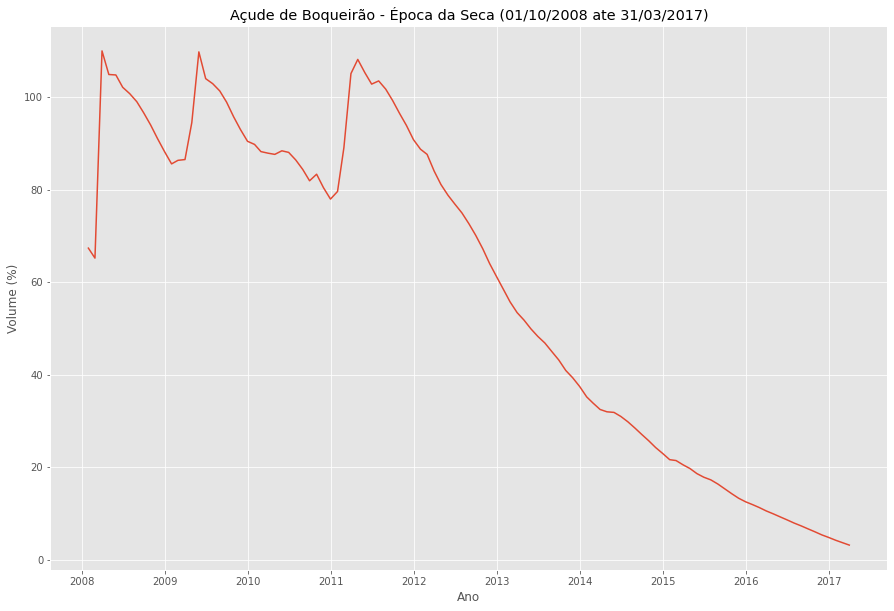

In [12]:
import matplotlib, matplotlib.pyplot as plt

matplotlib.style.use("ggplot")
plt.figure(figsize=(15,10))
plt.plot(df2["Volume (%)"])
# adcionando textos
plt.title("Açude de Boqueirão - Época da Seca (01/10/2008 ate 31/03/2017)")
plt.xlabel("Ano")
plt.ylabel("Volume (%)")
#plt.savefig("Boqueirao-seca.pdf")
plt.show()

In [13]:
print(list(range(1,10)))

[1, 2, 3, 4, 5, 6, 7, 8, 9]


In [14]:
len(df2)

111

In [15]:
365*11

4015

In [16]:
len(df2)

111

In [17]:
# criar uma coluna com os dias
df3 = df2
numero_de_medicoes = len(df3)
df3["mes"] = range(1,numero_de_medicoes+1)
df3.head()

,Volume (%),Volume (m³),Volume de chuvas (mm),mes
Data do registro,,,,
2008-01-31,67.39,2.774251e+08,0,1
2008-02-29,65.23,2.685472e+08,0,2
2008-03-31,110.03,4.529657e+08,0,3
2008-04-30,104.93,4.319852e+08,0,4
2008-05-31,104.83,4.315656e+08,0,5


In [ ]:
len(df3) # numero de tuplas ou linhas ou medições

In [18]:
df3.tail()

,Volume (%),Volume (m³),Volume de chuvas (mm),mes
Data do registro,,,,
2016-11-30,5.39,22196764.40,0,107
2016-12-31,4.82,19828074.48,0,108
2017-01-31,4.21,17343204.52,0,109
2017-02-28,3.72,15312655.88,0,110
2017-03-31,3.18,13094571.31,0,111


## Preparar os dados para aplicar o modelo de regressao

In [19]:
import warnings
warnings.filterwarnings('ignore')

import numpy, pandas as pd
import sklearn.linear_model as lm


olm = lm.LinearRegression()
#X = numpy.array([x.toordinal() for x in df3.index])[:, numpy.newaxis]
X = df3['mes'].values.reshape(-1, 1)
y = df3['Volume (%)'].values

In [20]:
X[:5]

array([[1],
       [2],
       [3],
       [4],
       [5]])

In [21]:
y[:5]

array([ 67.39,  65.23, 110.03, 104.93, 104.83])

## Aplicar o modelo de Regressao

In [22]:
olm.fit(X, y)
olm

LinearRegression()

## Métrica para avaliar o modelo
### R² - coeficiente de determinação.
É uma métrica que mede os o quanto dos futuros examplos são previstos corretamente. <br />
Varia entre 0 e 1. Quanto mais o R² se aproximar de 1, melhor a previsão. <br />
Um R² próximo de 0, não reflete o modelo.

In [23]:
# Predict values
from sklearn.metrics import r2_score

y_pred = olm.predict(df3['mes'].values.reshape(-1,1))
# Evaluate the model
r2 = r2_score(y, y_pred)
print('r2 = ', r2 )

r2 =  0.8591295085121183


### A reta de regressao

In [24]:
a = olm.coef_[0]
b = olm.intercept_
print(' y = {0} * x + {1}'.format(a, b))

 y = -1.0228873288873288 * x + 116.99205077805078


In [25]:
x1 = 112
y_prev = -1.0228873288873288 * x1 + 116.99205077805078
y_prev

2.4286699426699556

In [26]:
x1 = 113
y_prev = -1.0228873288873288 * x1 + 116.99205077805078
y_prev

1.405782613782634

## Plota os dados Previstos e Observados

Equação: y = -1.0228873288873288 * x + 116.99205077805078


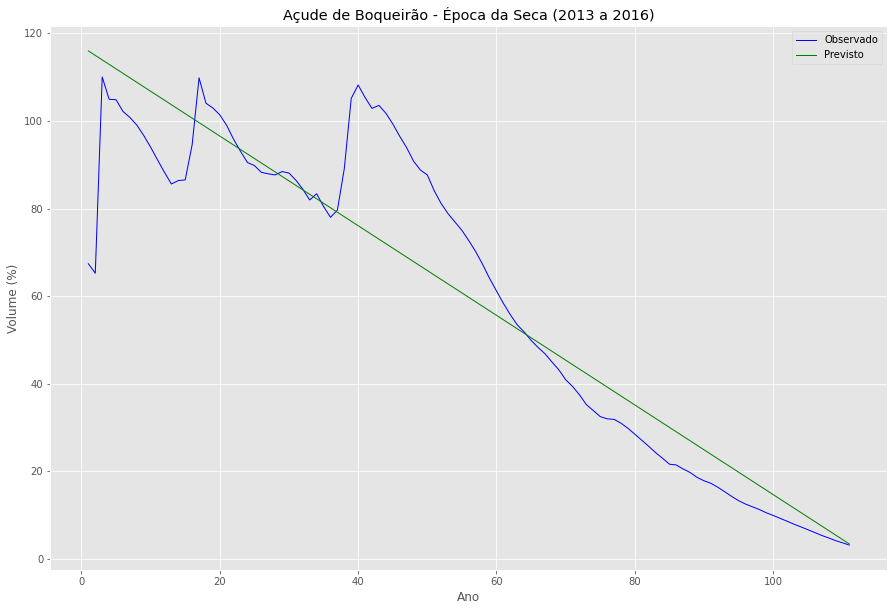

In [27]:
# Plot outputs
matplotlib.style.use("ggplot")
plt.figure(figsize=(15,10))

# Plot both data sets
#plt.scatter(X_test, Y_test,  color='black')
plt.plot(X, y, color='blue',
         linewidth=1)
plt.plot(X, olm.predict(X), color='green',
         linewidth=1)

# Add decorations
plt.title("Açude de Boqueirão - Época da Seca (2013 a 2016)")
plt.xlabel("Ano")
plt.ylabel("Volume (%)")
plt.legend(["Observado", "Previsto",], loc="upper right")

print('Equação: y = {0} * x + {1}'.format(a, b))
plt.show()

## predição futura

In [28]:
numero_de_meses_medicao = len(X)
numero_de_meses_medicao

111

In [29]:
import numpy as np
numero_de_meses_medicao = np.array(numero_de_meses_medicao).reshape(1, -1)
numero_de_meses_medicao

array([[111]])

In [30]:
numero_de_meses_medicao.shape

(1, 1)

In [31]:
# predicao para 30 dias - 1 mes de medicao
#numero_de_meses_medicao = np.array(numero_de_meses_medicao).reshape(1, -1)
pred = olm.predict(numero_de_meses_medicao+1)[0]
print ("Volume Boqueirão depois de um mes = %6.2f %%" % (pred))

Volume Boqueirão depois de um mes =   2.43 %


In [32]:
# predicao para 60 dias - 2 meses
numero_de_meses_medicao = np.array(numero_de_meses_medicao).reshape(1, -1)
pred = olm.predict(numero_de_meses_medicao+2)[0]
print ("Volume Boqueirão depois de 2 meses = %6.2f %%" % (pred))

Volume Boqueirão depois de 2 meses =   1.41 %


## predição até acabar a água

In [33]:
numero_de_meses_medicao = np.array(numero_de_meses_medicao).reshape(1, -1)
print("Última observação: 31 de Março de 2017: 3.18% - Volume")
print("Erro de Previsão (mês de Março) : Previsto - Observado = ", \
      "{:.2f}".format(olm.predict(numero_de_meses_medicao)[0] - 3.18) )

print ("\nPrevisão do Volume Boqueirão até Secar - Ano 2017")
meses = 0
nome_meses = [ "Março", "Abril", "Maio", "Junho", "Julho", "Agosto", "Setembro", "Outubro", "Novembro", "Dezembro"]
while (True):
    pred = olm.predict(numero_de_meses_medicao+meses)[0]
    if pred < 0:
        break
    print ("Volume Boqueirão - Mês de %s -> %-5.2f%%" % (nome_meses[meses],pred))
    meses = meses + 1
   # print(meses)
pred = olm.predict(numero_de_meses_medicao+meses)[0]
print ("Volume Boqueirão - Mês de %s  -> %-5.2f%%" % (nome_meses[meses],pred))

Última observação: 31 de Março de 2017: 3.18% - Volume
Erro de Previsão (mês de Março) : Previsto - Observado =  0.27

Previsão do Volume Boqueirão até Secar - Ano 2017
Volume Boqueirão - Mês de Março -> 3.45 %
Volume Boqueirão - Mês de Abril -> 2.43 %
Volume Boqueirão - Mês de Maio -> 1.41 %
Volume Boqueirão - Mês de Junho -> 0.38 %
Volume Boqueirão - Mês de Julho  -> -0.64%


### Isso indica que, em 2017, se não houvesse a recarga do mês de abril do Rio São Francisco, <br /> o açude de Boqueirão iria SECAR em Julho/2017